In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

In [26]:
# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [28]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [29]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : barrow
Processing Record 2 of Set 1 : kapaa
Processing Record 3 of Set 1 : khatanga
Processing Record 4 of Set 1 : deep river
Processing Record 5 of Set 1 : kamenka
Processing Record 6 of Set 1 : albany
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : jamestown
City not found. Skipping...
Processing Record 9 of Set 1 : fare
Processing Record 10 of Set 1 : fenoarivo atsinanana
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : sarapulka
Processing Record 13 of Set 1 : qaanaaq
Processing Record 14 of Set 1 : katsuura
Processing Record 15 of Set 1 : mezen
Processing Record 16 of Set 1 : ust-kuyga
Processing Record 17 of Set 1 : carnarvon
Processing Record 18 of Set 1 : benguela
Processing Record 19 of Set 1 : ghanzi
Processing Record 20 of Set 1 : brazzaville
Processing Record 21 of Set 1 : gushikawa
Processing Record 22 of Set 1 : gap
Processing Record 23 

In [18]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [19]:
weather_dict.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [56]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arlit,61,NE,1632287522,17,18.7369,7.3853,86.45,9.33
1,Hithadhoo,98,MV,1632287522,76,-0.6000,73.0833,82.90,15.05
2,Rikitea,0,PF,1632287523,72,-23.1203,-134.9692,73.85,15.32
3,Chokurdakh,97,RU,1632287523,54,70.6333,147.9167,38.93,9.28
4,Imbituba,100,BR,1632287524,75,-28.2400,-48.6703,58.89,12.35
...,...,...,...,...,...,...,...,...,...
596,Zhezkazgan,67,KZ,1632287769,37,47.8043,67.7144,48.67,13.73
597,Vostok,100,RU,1632287770,98,46.4856,135.8833,53.64,2.57
598,Zavallya,100,UA,1632287770,73,48.2135,30.0156,46.26,11.05
599,Bam,0,IR,1632287771,11,29.1060,58.3570,89.49,4.97


In [9]:
weather_dict.to_csv("output_data/cities.csv", index = False)

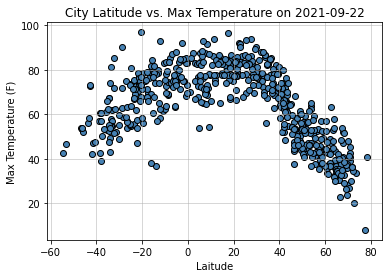

In [61]:
endRunDate = weather_dict["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature on {runDate}")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/City Latitude vs Max Temperature.png")



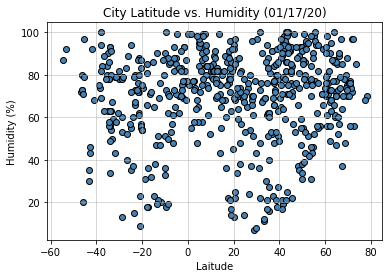

In [21]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/City Latitude vs Humidity.png")

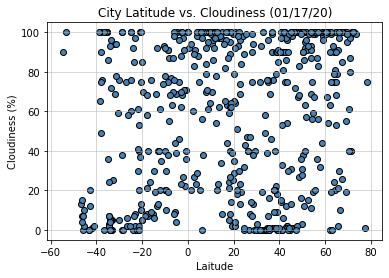

In [22]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/City Latitude vs Cloudiness.png")

In [43]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [47]:
Northern_DF = weather_dict.loc[weather_dict["Lat"] > 0]
Southern_DF = weather_dict.loc[weather_dict["Lat"] < 0]

The r-square is -0.8435239421309441
y = -0.77x + 92.69


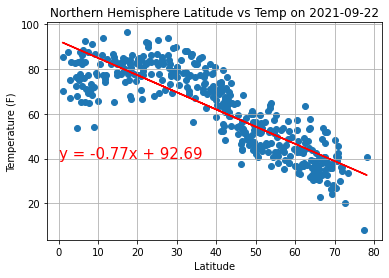

In [63]:
#set the data sets to compare
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')

The r-square is 0.6372063355786562
y = 0.62x + 80.84


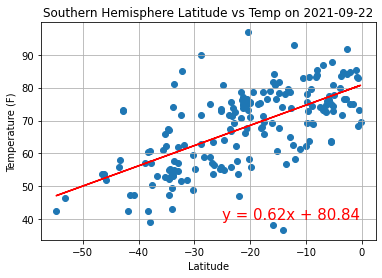

In [65]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

The r-square is -0.024641466217940163
y = -0.03x + 73.09


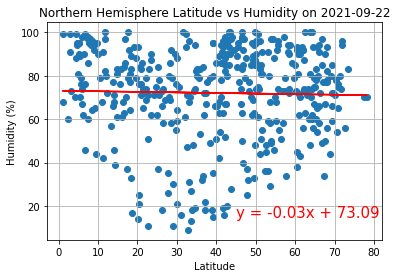

In [69]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is 0.043142623056410825
y = 0.08x + 65.96


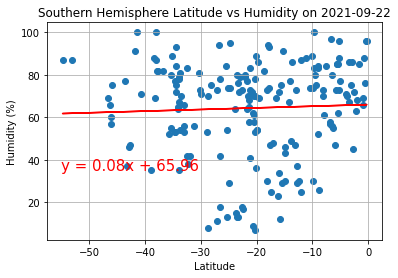

In [68]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is 0.0482435238076134
y = 0.09x + 58.9


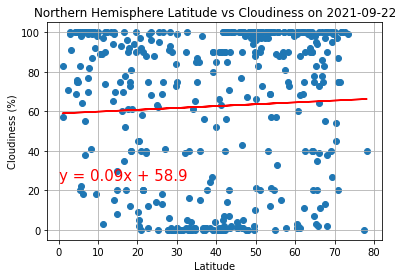

In [71]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

The r-square is 0.3003495062345708
y = 0.89x + 62.88


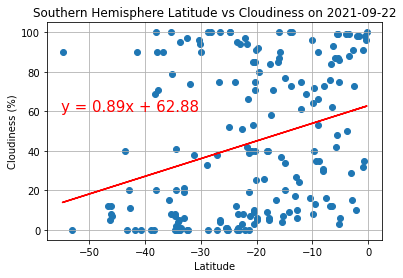

In [73]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

The r-square is 0.21651114315442305
y = 0.07x + 5.01


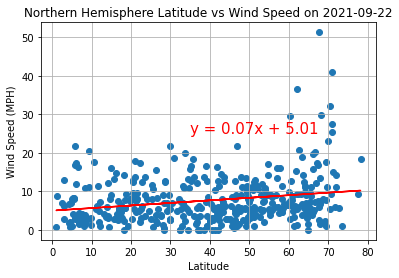

In [74]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

The r-square is -0.1774559803155047
y = -0.07x + 6.47


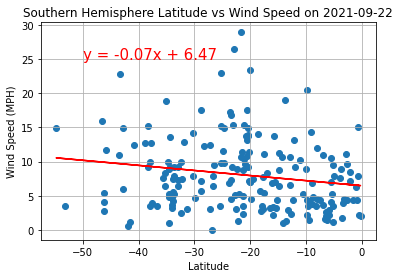

In [76]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Wind Speed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()